<a href="https://colab.research.google.com/github/Seomzo/Project_1-Money_Printer/blob/initial-data-modelling/crypto_price_predictor_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install yfinance
!pip install prophet

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

import yfinance as yf

%matplotlib inline


In [55]:
from datetime import datetime

start_date='2017-01-01'
today_date = datetime.today().strftime('%Y-%m-%d')

print(f"Today's date in YYYY-MM-DD format: {today_date}")

Today's date in YYYY-MM-DD format: 2024-11-18


In [56]:
# In this section, we will implement a function that prompts the user to enter a date in the `YYYY-MM-DD` format. 
# The function will validate the input and ensure that it is correctly formatted.

# If the user enters an invalid date format, they will be given up to three attempts to enter a valid date. 
# If they fail to provide a valid date after three attempts, the program will default to the date `2024-01-01`.

# The function will then calculate the number of days from the entered (or defaulted) date to today's date.

# Declare slice_date as a global variable
slice_date = ''

# Function to validate date format and calculate period value
def get_period_value():
    global slice_date  # Use the global variable
    attempts = 0
    max_attempts = 3

    while attempts < max_attempts:
        # Ask user for slice date
        slice_date = input(f"To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after {start_date} but before {today_date}: ")

        # Validate the date format
        try:
            # Attempt to parse the date
            parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')
            break  # Exit the loop if the date is valid
        except ValueError:
            attempts += 1
            print("Invalid date format. Please enter the date in YYYY-MM-DD format.")
            if attempts == max_attempts:
                print("Maximum attempts reached. Defaulting to 2024-01-01.")
                slice_date = '2024-01-01'
                parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')

    # Calculate the number of days from the slice date to today
    today = datetime.today()
    period_value = (today - parsed_date).days

    return period_value

In [57]:
crypto_symbol = 'BTC-USD'
crypto_symbol = input("Enter crypto symbol: ").upper()
print(f"Crypto Symbol: {crypto_symbol}")

Crypto Symbol: XRP-USD


In [58]:
period_value = get_period_value()
if period_value is not None:
    print(f"Number of days from {slice_date} to today: {period_value}")

Number of days from 2024-10-10 to today: 39


In [59]:
# Fetch historical data for Bitcoin and Ethereum
btc = yf.download(crypto_symbol, start=start_date, end=today_date)
# eth = yf.download('ETH-USD', start='2015-01-01', end='2023-01-01')

# Display the first few rows of each dataset to inspect the data
print("Bitcoin data:")
display(btc.head())
display(btc.tail())

# print("\nEthereum data:")
# print(eth.head())


[*********************100%***********************]  1 of 1 completed

Bitcoin data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD
Date,,,,,,
2017-11-09 00:00:00+00:00,0.217488,0.217488,0.221791,0.214866,0.217911,147916992
2017-11-10 00:00:00+00:00,0.206483,0.206483,0.219068,0.205260,0.218256,141032992
2017-11-11 00:00:00+00:00,0.210430,0.210430,0.214456,0.205459,0.205948,134503008
2017-11-12 00:00:00+00:00,0.197339,0.197339,0.210214,0.195389,0.210214,251175008
2017-11-13 00:00:00+00:00,0.203442,0.203442,0.204081,0.197456,0.197472,132567000


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD
Date,,,,,,
2024-11-13 00:00:00+00:00,0.690288,0.690288,0.743535,0.642591,0.707636,7773620799
2024-11-14 00:00:00+00:00,0.773007,0.773007,0.845211,0.684417,0.690288,9458526339
2024-11-15 00:00:00+00:00,0.892091,0.892091,0.924821,0.772579,0.773008,11738281623
2024-11-16 00:00:00+00:00,1.119090,1.119090,1.256744,0.879924,0.892092,22568823580
2024-11-17 00:00:00+00:00,1.054335,1.054335,1.154595,1.005463,1.119088,12066098151


In [60]:
# The code removes any rows with missing values from the DataFrame and then 
# selects the 'Close' prices up to a specified date (slice_date). 

btc.dropna(inplace=True)
crypto_data = btc.loc[:slice_date, 'Close']
display(crypto_data.head())
display(crypto_data.tail())


Ticker,XRP-USD
Date,
2017-11-09 00:00:00+00:00,0.217488
2017-11-10 00:00:00+00:00,0.206483
2017-11-11 00:00:00+00:00,0.210430
2017-11-12 00:00:00+00:00,0.197339
2017-11-13 00:00:00+00:00,0.203442


Ticker,XRP-USD
Date,
2024-10-06 00:00:00+00:00,0.533592
2024-10-07 00:00:00+00:00,0.529934
2024-10-08 00:00:00+00:00,0.530868
2024-10-09 00:00:00+00:00,0.524332
2024-10-10 00:00:00+00:00,0.529977


<Axes: xlabel='Date'>

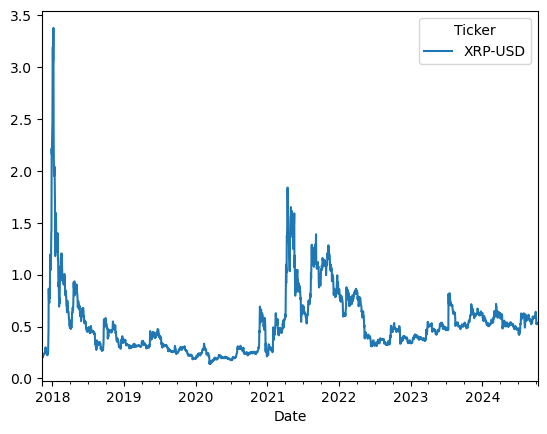

In [61]:
# A line plot of the Bitcoin closing prices from the start date (2017) up to 
# the specified slice_date. This visualization allows for an easy analysis of 
# the price trends and movements of Bitcoin over the selected time period.

crypto_data.plot()

In [62]:
crypto_data = crypto_data.reset_index()
crypto_df = crypto_data.rename(columns={'Date':'ds', crypto_symbol: 'y'})
display(crypto_data.head())
display(crypto_data.tail())

Ticker,Date,XRP-USD
0,2017-11-09 00:00:00+00:00,0.217488
1,2017-11-10 00:00:00+00:00,0.206483
2,2017-11-11 00:00:00+00:00,0.210430
3,2017-11-12 00:00:00+00:00,0.197339
4,2017-11-13 00:00:00+00:00,0.203442


Ticker,Date,XRP-USD
2523,2024-10-06 00:00:00+00:00,0.533592
2524,2024-10-07 00:00:00+00:00,0.529934
2525,2024-10-08 00:00:00+00:00,0.530868
2526,2024-10-09 00:00:00+00:00,0.524332
2527,2024-10-10 00:00:00+00:00,0.529977


In [63]:
display(crypto_df.head())
display(crypto_df.tail())

Ticker,ds,y
0,2017-11-09 00:00:00+00:00,0.217488
1,2017-11-10 00:00:00+00:00,0.206483
2,2017-11-11 00:00:00+00:00,0.210430
3,2017-11-12 00:00:00+00:00,0.197339
4,2017-11-13 00:00:00+00:00,0.203442


Ticker,ds,y
2523,2024-10-06 00:00:00+00:00,0.533592
2524,2024-10-07 00:00:00+00:00,0.529934
2525,2024-10-08 00:00:00+00:00,0.530868
2526,2024-10-09 00:00:00+00:00,0.524332
2527,2024-10-10 00:00:00+00:00,0.529977


In [64]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ds      2528 non-null   datetime64[ns, UTC]
 1   y       2528 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 39.6 KB


In [65]:
# The code initializes a Prophet model and fits it to the cryptocurrency data 
# after removing timezone information from the date column. It then creates a 
# future dataframe for predictions, forecasts future trends, and displays the 
# first five rows of the resulting forecast DataFrame

crypto_model = Prophet()
crypto_df['ds'] = crypto_df['ds'].dt.tz_localize(None)
crypto_model.fit(crypto_df)
future_trends = crypto_model.make_future_dataframe(periods=period_value, freq="D")
forecast_trends = crypto_model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

21:31:13 - cmdstanpy - INFO - Chain [1] start processing
21:31:13 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,0.961372,0.674273,1.210018,0.961372,0.961372,-0.011612,-0.011612,-0.011612,-0.001238,-0.001238,-0.001238,-0.010374,-0.010374,-0.010374,0.0,0.0,0.0,0.949760
1,2017-11-10,0.960836,0.705019,1.202962,0.960836,0.960836,-0.014867,-0.014867,-0.014867,-0.000005,-0.000005,-0.000005,-0.014861,-0.014861,-0.014861,0.0,0.0,0.0,0.945969
2,2017-11-11,0.960300,0.676138,1.193113,0.960300,0.960300,-0.016697,-0.016697,-0.016697,0.002563,0.002563,0.002563,-0.019260,-0.019260,-0.019260,0.0,0.0,0.0,0.943603
3,2017-11-12,0.959764,0.692182,1.193624,0.959764,0.959764,-0.022595,-0.022595,-0.022595,0.000955,0.000955,0.000955,-0.023549,-0.023549,-0.023549,0.0,0.0,0.0,0.937169
4,2017-11-13,0.959228,0.667916,1.183735,0.959228,0.959228,-0.027263,-0.027263,-0.027263,0.000451,0.000451,0.000451,-0.027714,-0.027714,-0.027714,0.0,0.0,0.0,0.931965


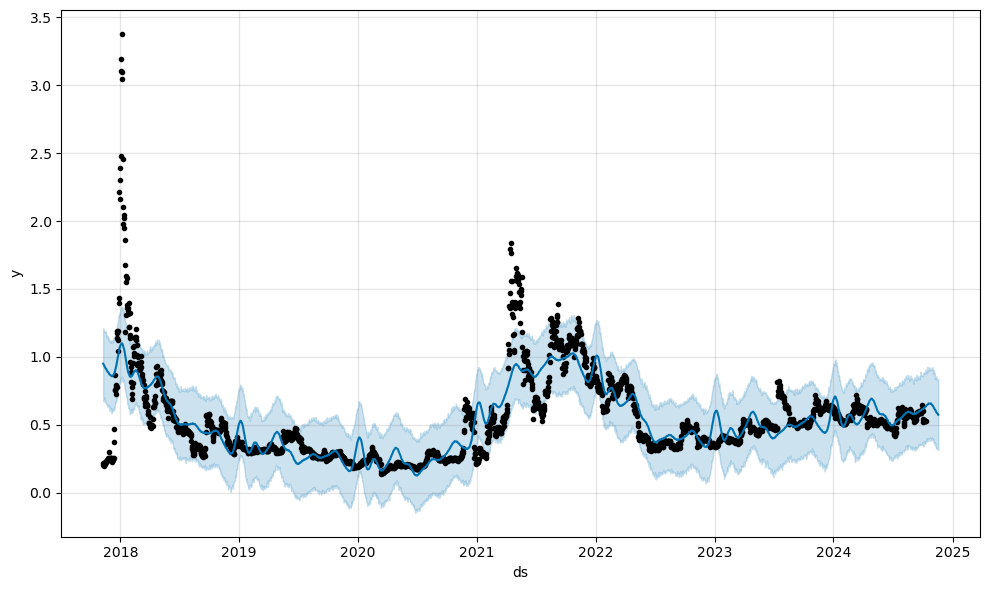

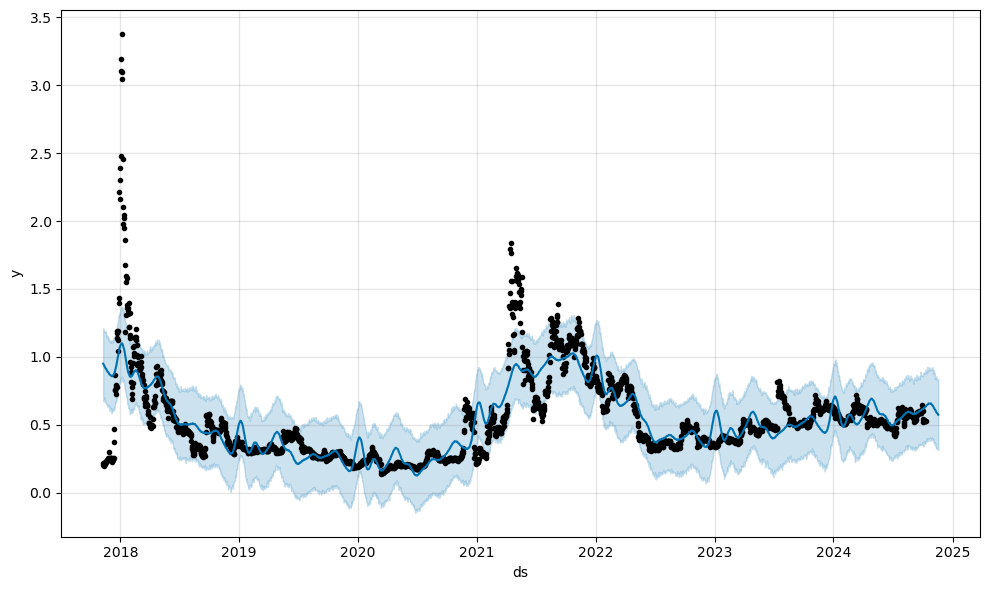

In [66]:
# This cell is responsible for plotting the forecast trends against actual values built from prophet model. 
# However it does not include the real data from slice date to current date. 
crypto_model.plot(forecast_trends)

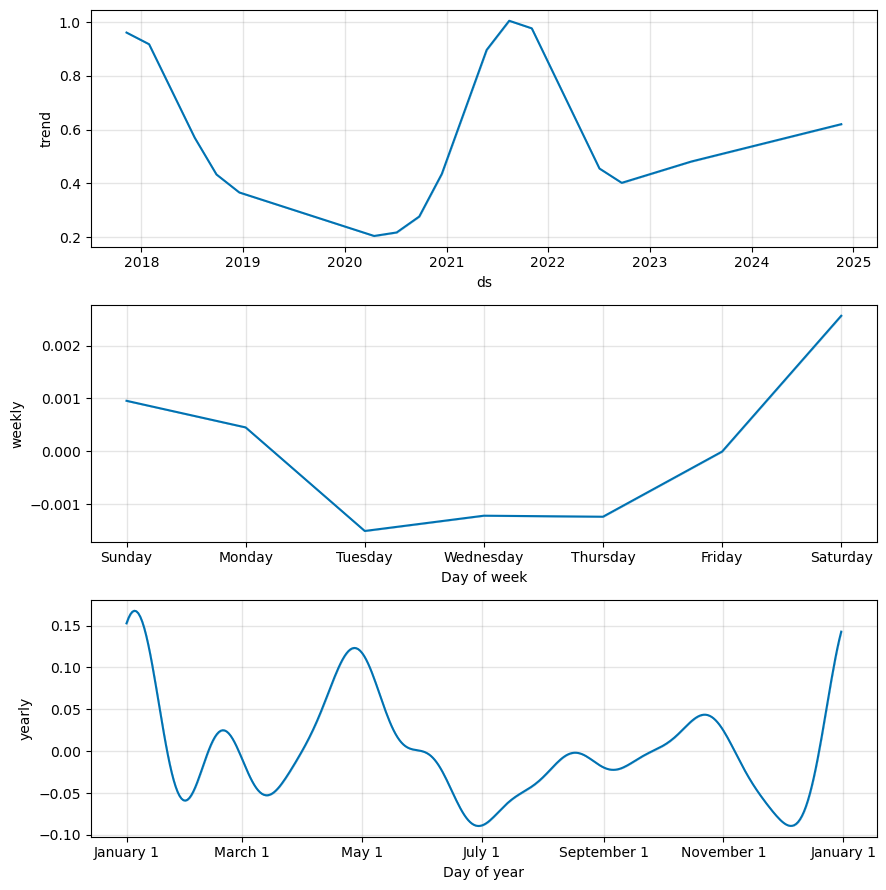

In [67]:
# Plotting the components of the model.
figures = crypto_model.plot_components(forecast_trends)

### Summary of Plots

1. **Trend**: Steady growth from 2017, dips in 2022, and sharp rise towards 2025.  
2. **Weekly Seasonality**: Peaks on Mondays, lowest on Thursdays, slight weekend recovery.  
3. **Yearly Seasonality**: Peaks in March, dips in July-August, recovers in autumn.  


In [68]:
forecast_trends= forecast_trends[['ds','yhat']]

In [69]:
forecast_trends.set_index('ds', inplace=True)


In [70]:
# reduce the slice_date by period value into another variable

reduced_date = pd.to_datetime(slice_date) - pd.DateOffset(days=period_value)

# compare reduced_date with start_date and see which one is later and keep that date in reduced_date
if reduced_date < pd.to_datetime(start_date):
    reduced_date = pd.to_datetime(start_date)

reduced_date_str = reduced_date.strftime('%Y-%m-%d')
print(f"Reduced Date: {reduced_date_str} and Slice Date: {slice_date}")



Reduced Date: 2024-09-01 and Slice Date: 2024-10-10


In [71]:
forecast_dataframe = forecast_trends.loc[reduced_date:].copy()   # Data from 2024-01-01 to now

# df_after_2024['Date'] = df_after_2024['Date'].dt.tz_localize(None)
# df_after_2024.set_index('Date', inplace=True)
display (forecast_dataframe.head())





,yhat
ds,
2024-09-01,0.581365
2024-09-02,0.580152
2024-09-03,0.577701
2024-09-04,0.577729
2024-09-05,0.577688


In [72]:
real_values_for_compare_df = btc.loc[reduced_date_str:, 'Close'].copy()
# real_values_for_compare_df = real_values_for_compare_df.reset_index()
real_values_for_compare_df = real_values_for_compare_df.reset_index()
# real_2024.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)

real_values_for_compare_df['Date'] = real_values_for_compare_df['Date'].dt.tz_localize(None)

display(real_values_for_compare_df.head())

Ticker,Date,XRP-USD
0,2024-09-01,0.547990
1,2024-09-02,0.567587
2,2024-09-03,0.557391
3,2024-09-04,0.558176
4,2024-09-05,0.544196


In [73]:
real_values_for_compare_df = real_values_for_compare_df.set_index('Date')


In [74]:
display(real_values_for_compare_df.head())
display(real_values_for_compare_df.tail())

Ticker,XRP-USD
Date,
2024-09-01,0.547990
2024-09-02,0.567587
2024-09-03,0.557391
2024-09-04,0.558176
2024-09-05,0.544196


Ticker,XRP-USD
Date,
2024-11-13,0.690288
2024-11-14,0.773007
2024-11-15,0.892091
2024-11-16,1.119090
2024-11-17,1.054335


In [75]:
# merge the 2 dataframes

merged_for_comparsion_df = real_values_for_compare_df.join(forecast_dataframe, how='inner')
display(merged_for_comparsion_df.head())
display(merged_for_comparsion_df.tail())


,XRP-USD,yhat
2024-09-01,0.547990,0.581365
2024-09-02,0.567587,0.580152
2024-09-03,0.557391,0.577701
2024-09-04,0.558176,0.577729
2024-09-05,0.544196,0.577688


,XRP-USD,yhat
2024-11-13,0.690288,0.589014
2024-11-14,0.773007,0.585256
2024-11-15,0.892091,0.582885
2024-11-16,1.119090,0.581984
2024-11-17,1.054335,0.577032


In [76]:
merged_for_comparsion_df.rename(columns={crypto_symbol:'Actual Price', 'yhat':'Predicted Price'}, inplace=True)
display(merged_for_comparsion_df)



,Actual Price,Predicted Price
2024-09-01,0.547990,0.581365
2024-09-02,0.567587,0.580152
2024-09-03,0.557391,0.577701
2024-09-04,0.558176,0.577729
2024-09-05,0.544196,0.577688
...,...,...
2024-11-13,0.690288,0.589014
2024-11-14,0.773007,0.585256
2024-11-15,0.892091,0.582885
2024-11-16,1.119090,0.581984


A line plot to compare the Prophet model's predictions against the actual values, with the model trained on data prior to the red vertical line (representing the slice_date). The area after the red line displays the model's forecasts, allowing for a visual assessment of how well the predictions align with the real values.


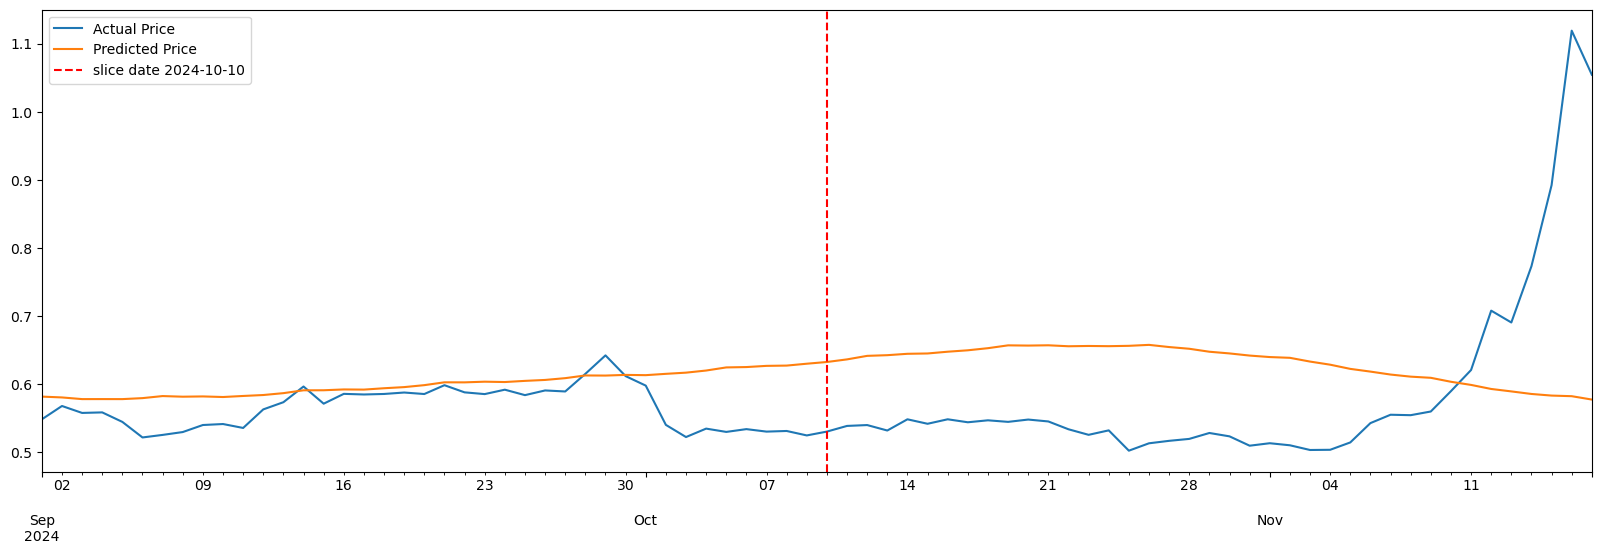

<Axes: >

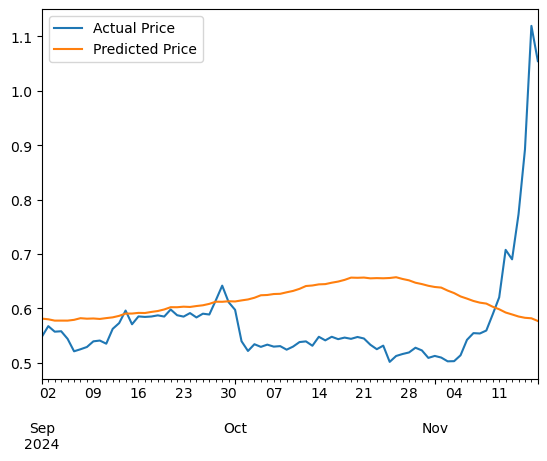

In [77]:


# The code generates a line plot to compare the Prophet model's predictions 
# against the actual values, with the model trained on data prior to the red 
# vertical line (representing the slice_date). The area after the red line 
# displays the model's forecasts, allowing for a visual assessment of how well 
# the predictions align with the real values.


fig, ax = plt.subplots(figsize=(20, 6))  # Change the width and height as needed
merged_for_comparsion_df.plot(ax=ax)
label_date = f"slice date {slice_date}"
plt.axvline(x=pd.to_datetime(slice_date), color='red', linestyle='--', label=label_date)

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()
merged_for_comparsion_df.plot()


# Now for the fun part... Buy or Sell ?

  - Determine Buy/Sell Signals: After making predictions, you need to establish criteria for when to buy or sell based on the forecasted prices. For example, you could decide to buy if the forecasted price is significantly higher than the last known price and sell if it is lower.

  - Create Buy/Sell Data: Create a new DataFrame that holds the dates and corresponding buy/sell signals.

  - Plot the Forecast and Indicators: Use Matplotlib to plot the forecast and overlay the buy/sell indicators on the graph.


In [78]:
full_crypto_data = btc.loc[:, 'Close'].copy()

full_crypto_data = full_crypto_data.reset_index()

full_crypto_data = full_crypto_data.rename(columns={'Date':'ds', crypto_symbol: 'y'})

full_crypto_data['ds'] = full_crypto_data['ds'].dt.tz_localize(None)

display(full_crypto_data.head())
display(full_crypto_data.tail())

Ticker,ds,y
0,2017-11-09,0.217488
1,2017-11-10,0.206483
2,2017-11-11,0.210430
3,2017-11-12,0.197339
4,2017-11-13,0.203442


Ticker,ds,y
2561,2024-11-13,0.690288
2562,2024-11-14,0.773007
2563,2024-11-15,0.892091
2564,2024-11-16,1.119090
2565,2024-11-17,1.054335


In [79]:
model = Prophet()
model.fit(full_crypto_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


21:31:15 - cmdstanpy - INFO - Chain [1] start processing
21:31:15 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
# Determine buy/sell signals
buy_signals = []
sell_signals = []
#last_price = full_crypto_data['y'].iloc[-1]
last_60_rows = forecast.iloc[-60:]

tomorrow_price = last_60_rows['yhat'].iloc[-30]
month_later_price = last_60_rows['yhat'].iloc[-1]
print(f"{tomorrow_price} -> {month_later_price}")

# prompt percentage change between tomorrow_price and month_later_price
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100
print(f"Percentage change: {percentage_change:.2f}%")


0.571907028933426 -> 0.5755234076154659
Percentage change: 0.63%


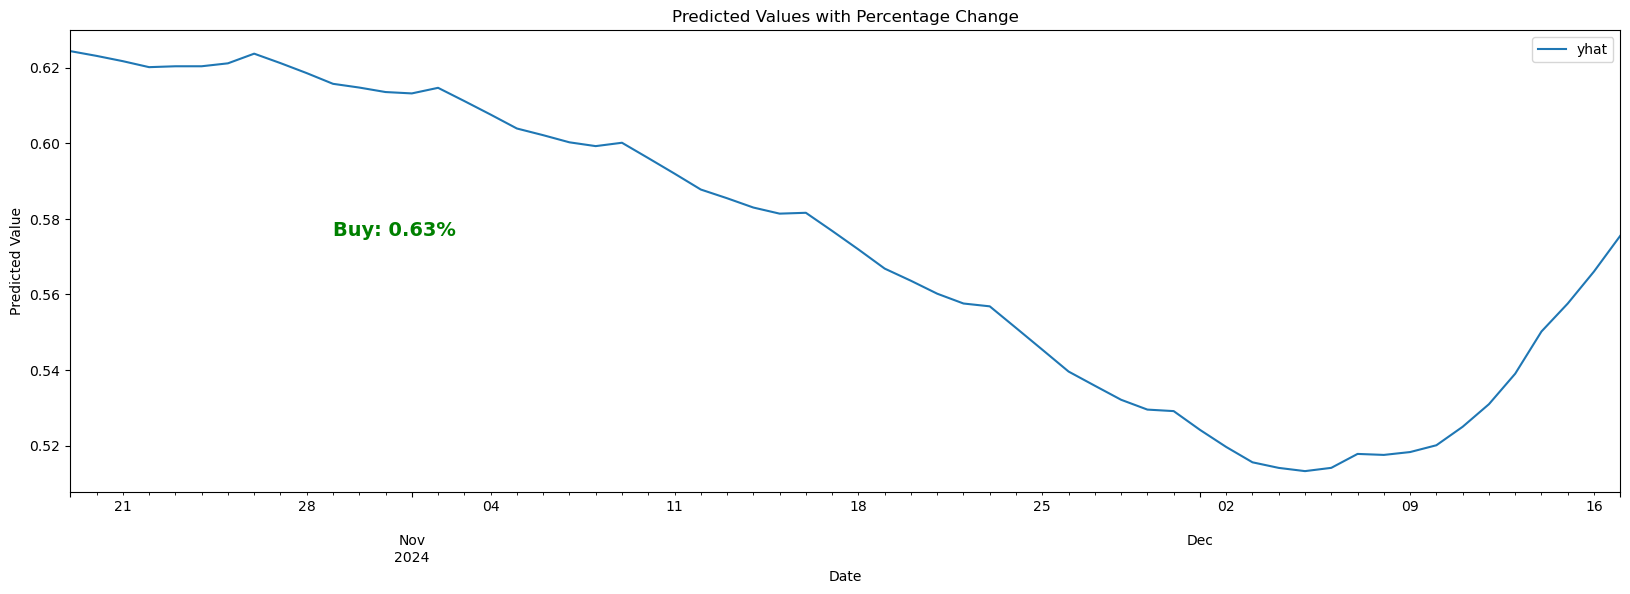

In [89]:
last_60_rows.plot(x='ds', y='yhat', figsize=(20, 6))

# Calculate the percentage change
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100

# Add the percentage change value to the plot
if(percentage_change > 0):
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Buy: {percentage_change:.2f}%',
         fontsize=14, fontweight='bold', color='green')
else:
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Sell: {percentage_change:.2f}%  ',
         fontsize=14, fontweight='bold', color='red')

plt.title('Predicted Values with Percentage Change')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.show()


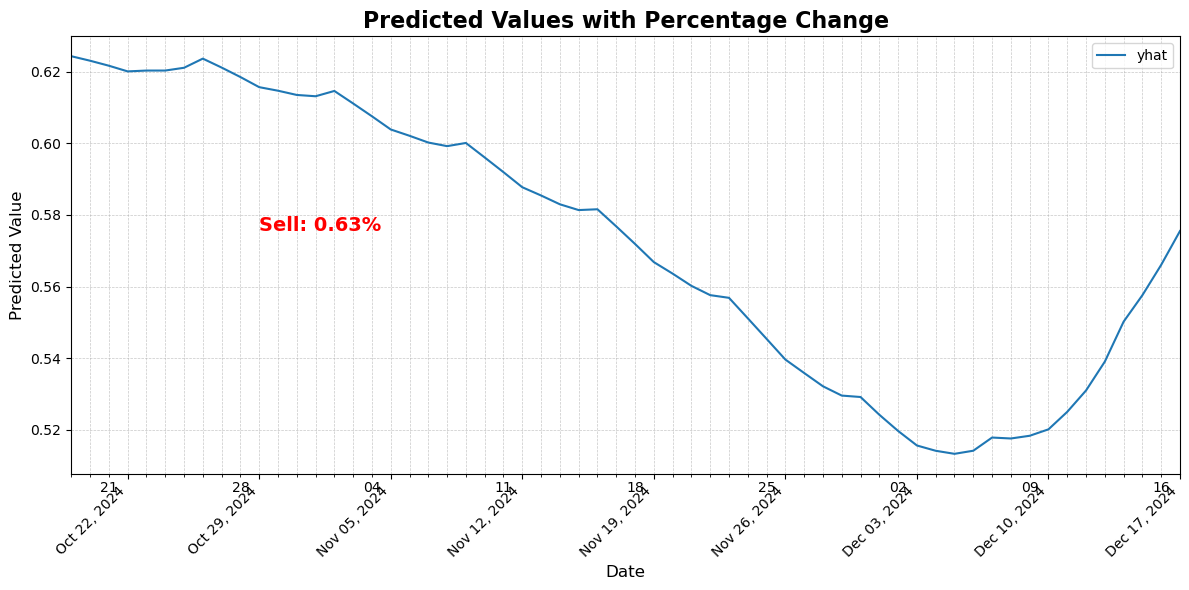

In [91]:
import matplotlib.dates as mdates

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))
last_60_rows.plot(x='ds', y='yhat', ax=ax)

# Formatting the x-axis for better date readability
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Show every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))  # Format as 'Month Day, Year'
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Calculate the percentage change
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100

# Add the prediction text
if(percentage_change < 0):
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Buy: {percentage_change:.2f}%',
         fontsize=14, fontweight='bold', color='green')
else:
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Sell: {percentage_change:.2f}%  ',
         fontsize=14, fontweight='bold', color='red')

# Add labels and title
plt.title('Predicted Values with Percentage Change', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Predicted Value', fontsize=12)

# Show grid for better visualization
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



### Executive Summary

This script generates a predictive line plot for forecasted values (`yhat`) over a 60-day period, offering actionable investment insights.

#### **Key Features**:
1. **Plot**:
   - Visualizes predicted values with clear date formatting and rotated labels.
   - Includes a bold prediction overlay:  
     - **Green "BUY"** for positive percentage change.  
     - **Red "SELL"** for negative percentage change.
   
2. **Logic**:
   - **Percentage change**: Calculated between tomorrow's value and the value a month later.  
   - Recommendation based on the trend:
     - Positive change → "BUY"  
     - Negative change → "SELL"


#### **Purpose**:
To provide clear, data-driven insights for short-term investment decisions.